[View in Colaboratory](https://colab.research.google.com/github/OfirTadmor/DeepLearningColman/blob/Task1/IMDB_CNN.ipynb)

In [1]:
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Convolution1D, Flatten, Dropout
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.callbacks import TensorBoard

# Using keras to load the dataset with the top_words
top_words = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

# Pad the sequences to the same length
max_review_length = 1600
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

# Using embedding from Keras
embedding_vecor_length = 300
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))

# Convolutional model (3x conv, flatten, 2x dense)
model.add(Convolution1D(64, 3, padding='same'))
model.add(Convolution1D(32, 3, padding='same'))
model.add(Convolution1D(16, 3, padding='same'))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(180,activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

# Log to tensorboard
#tensorBoardCallback = TensorBoard(log_dir='./logs', write_graph=True)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

#model.fit(X_train, y_train, epochs=3, callbacks=[tensorBoardCallback], batch_size=64)
history = model.fit(X_train, y_train, epochs=3, batch_size=64)

# Evaluation on the test set
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Using TensorFlow backend.


17465344/17464789 [==============================] - 1s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1600, 300)         3000000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1600, 64)          57664     
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 1600, 32)          6176      
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 1600, 16)          1552      
_________________________________________________________________
flatten_1 (Flatten)          (None, 25600)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 25600)             0         
_________________________________________________________________
dense_1 (De

25000/25000 [==============================] - 543s 22ms/step - loss: 0.3767 - acc: 0.8273
Epoch 2/3
24448/25000 [============================>.] - ETA: 11s - loss: 0.1620 - acc: 0.9387

25000/25000 [==============================] - 537s 21ms/step - loss: 0.1624 - acc: 0.9386
Epoch 3/3
25000/25000 [==============================] - 841s 34ms/step - loss: 0.0508 - acc: 0.9839
Accuracy: 86.21%


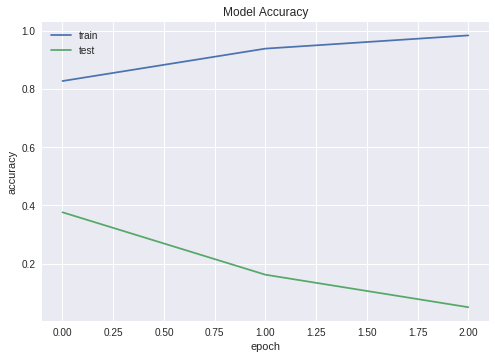

In [6]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['loss'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show();